In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [3]:
df = pd.read_csv('datasets/owid-covid-data.csv')
df = df[df['continent'].notna()]
display(df)

countries = df['iso_code'].to_numpy()
countries = np.unique(countries)
print(df.columns)
print(countries)
print(f'{len(countries)} countries')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134661,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134662,ZWE,Africa,Zimbabwe,2021-11-17,133557.0,52.0,36.429,4699.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134663,ZWE,Africa,Zimbabwe,2021-11-18,133593.0,36.0,37.714,4699.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134664,ZWE,Africa,Zimbabwe,2021-11-19,133593.0,0.0,37.714,4699.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
sort_df = df.sort_values(by=['date'], ascending=True)
dates = pd.to_datetime(sort_df['date'])
date_diffs = dates.diff().to_numpy()[1:]
second_diffs = date_diffs / np.timedelta64(1, 's')
day_diffs = second_diffs / (24 * 3600)

print(day_diffs)
assert max(day_diffs) < 2
print('unique day offsets', np.unique(day_diffs))

[0. 0. 1. ... 0. 0. 0.]
unique day offsets [0. 1.]


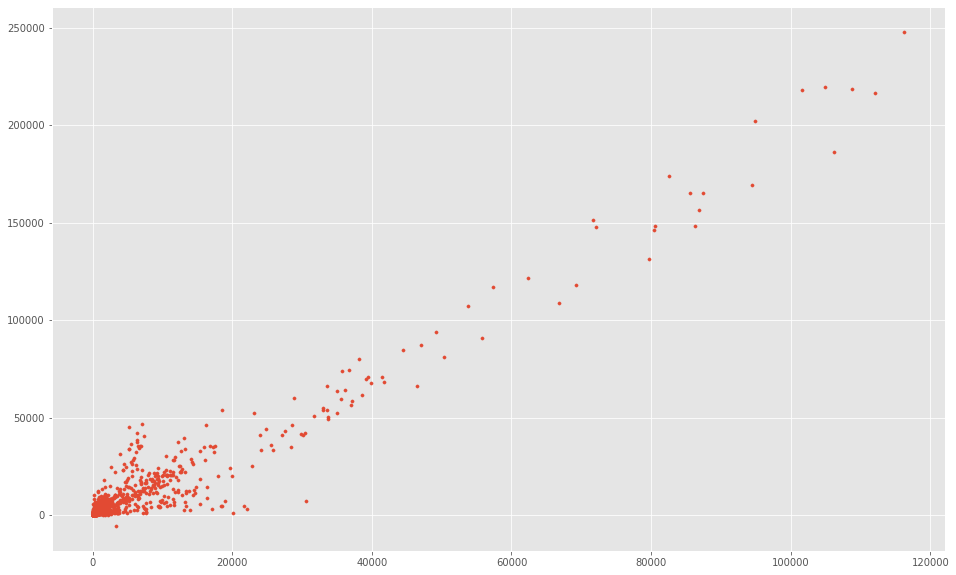

In [5]:
weekly_hosp_admissions = df['weekly_hosp_admissions']
cases = df['new_cases_smoothed']
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
plt.scatter(weekly_hosp_admissions, cases, s=10)

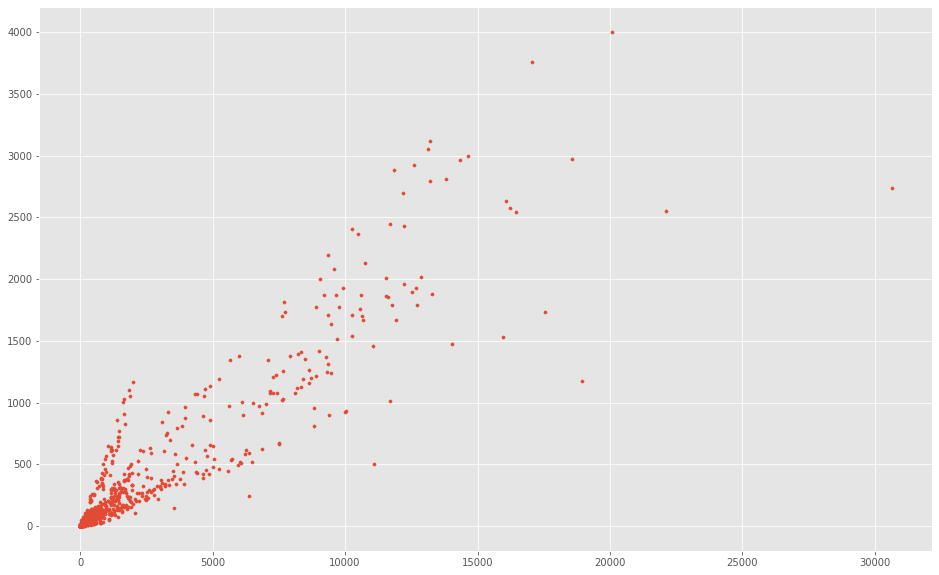

In [6]:
# weekly_hosp_admissions = df['weekly_hosp_admissions']
icu_admissions = df['weekly_hosp_admissions']
cases = df['weekly_icu_admissions']
# cases = df['weekly_icu_admissions']
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
plt.scatter(weekly_hosp_admissions, cases, s=10)

In [7]:
df['iso_code'] == 'sgp'

0         False
1         False
2         False
3         False
4         False
          ...  
134661    False
134662    False
134663    False
134664    False
134665    False
Name: iso_code, Length: 126075, dtype: bool

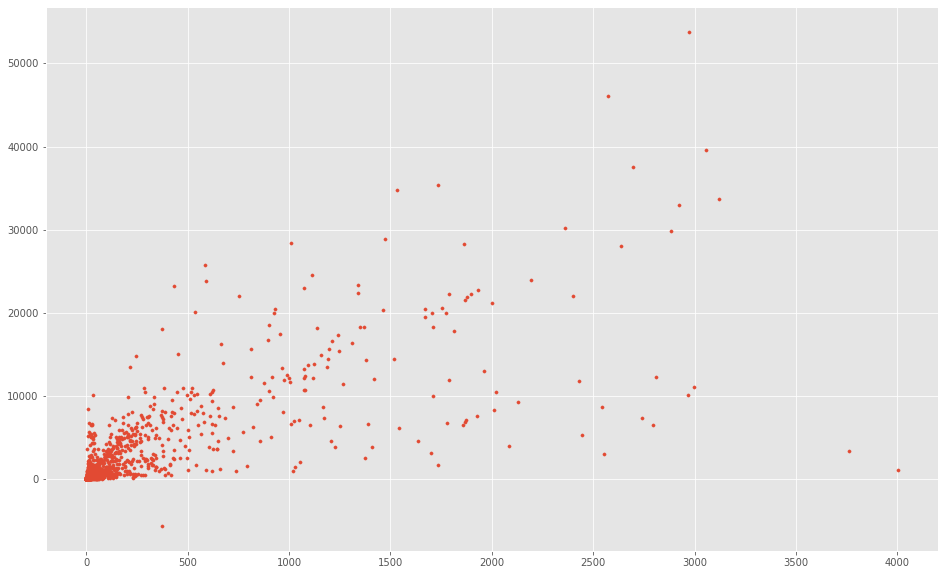

In [8]:
# weekly_hosp_admissions = df['weekly_hosp_admissions']
sgp_df = df #[df['iso_code'] == 'sgp']
icu_admissions = sgp_df['weekly_icu_admissions']
cases = sgp_df['new_cases_smoothed']
# cases = df['weekly_icu_admissions']
plt.style.use('ggplot')

plt.figure(figsize=(16,10))
plt.scatter(icu_admissions, cases, s=10)

<AxesSubplot:xlabel='new_cases_smoothed', ylabel='weekly_icu_admissions'>

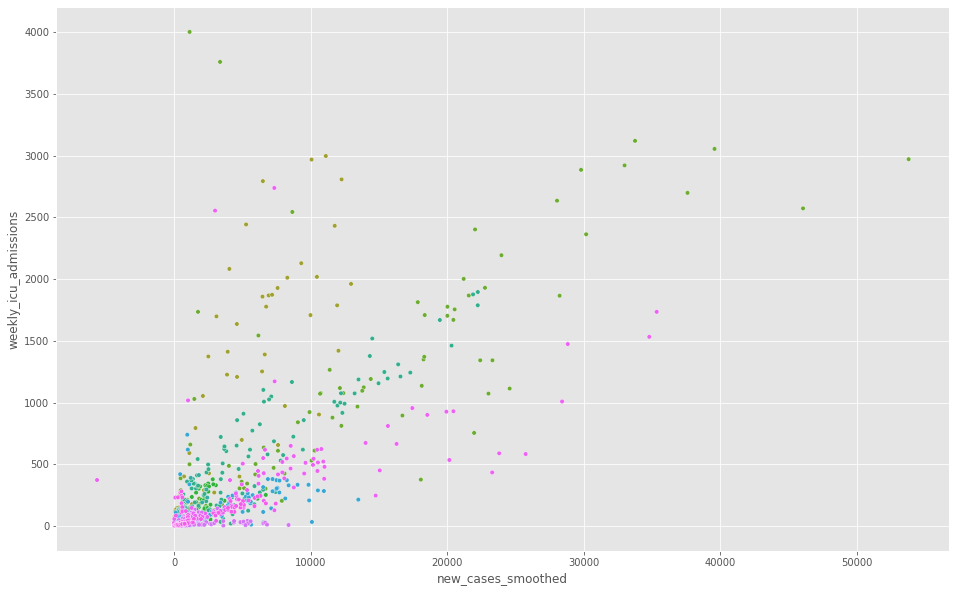

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='new_cases_smoothed', y='weekly_icu_admissions',
    data=df, legend=False, s=20, hue='iso_code'
)

(array([1159.,   76.,   47.,   22.,   25.,    7.,   10.,    8.,    0.,
           2.]),
 array([   0.    ,  400.2456,  800.4912, 1200.7368, 1600.9824, 2001.228 ,
        2401.4736, 2801.7192, 3201.9648, 3602.2104, 4002.456 ]),
 <BarContainer object of 10 artists>)

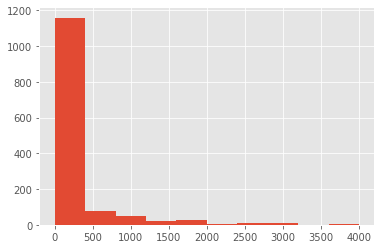

In [10]:
plt.style.use('ggplot')
icu = df['weekly_icu_admissions']
plt.hist(icu)

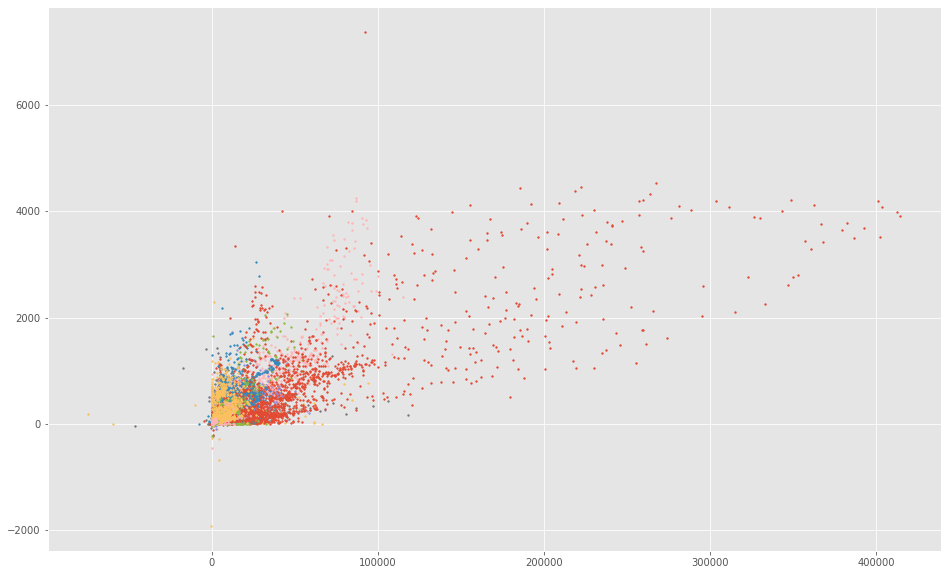

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))

for iso_code in countries:
    iso_df = df[df['iso_code'] == iso_code]
    icu_admissions = iso_df['new_deaths'].fillna(0)
    cases = iso_df['new_cases'].fillna(0)
    # cases = df['weekly_icu_admissions']
    plt.scatter(cases, icu_admissions, s=3)

(array([5.8116e+04, 9.3820e+03, 5.2090e+03, 3.8820e+03, 3.3030e+03,
        3.1120e+03, 2.4740e+03, 2.0420e+03, 1.8420e+03, 1.6250e+03,
        1.3990e+03, 1.2390e+03, 1.1670e+03, 1.0770e+03, 9.5000e+02,
        8.3600e+02, 7.0900e+02, 7.1200e+02, 6.2000e+02, 5.5800e+02,
        5.7300e+02, 5.5300e+02, 4.4100e+02, 4.1900e+02, 4.1500e+02,
        3.5400e+02, 3.1100e+02, 3.1500e+02, 2.8000e+02, 2.7400e+02,
        2.5800e+02, 2.5000e+02, 2.3600e+02, 2.2800e+02, 2.2900e+02,
        2.4600e+02, 2.1000e+02, 1.7800e+02, 1.8800e+02, 1.9500e+02,
        1.5800e+02, 2.0300e+02, 1.6600e+02, 1.6600e+02, 1.4300e+02,
        1.5400e+02, 1.2500e+02, 1.5300e+02, 1.4000e+02, 1.4000e+02,
        1.5400e+02, 1.3100e+02, 1.4600e+02, 1.4700e+02, 1.5200e+02,
        1.4100e+02, 1.2000e+02, 1.0400e+02, 1.2700e+02, 9.9000e+01,
        1.1000e+02, 1.3600e+02, 1.1600e+02, 9.4000e+01, 1.0900e+02,
        1.1700e+02, 1.1700e+02, 9.6000e+01, 1.0400e+02, 1.0500e+02,
        6.7000e+01, 8.5000e+01, 9.1000e+01, 7.70

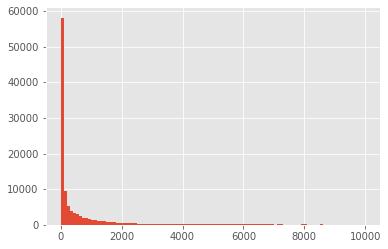

In [12]:
plt.hist(df['new_cases_smoothed'], bins=100, range=[0, 10000])

0.7887606583382907


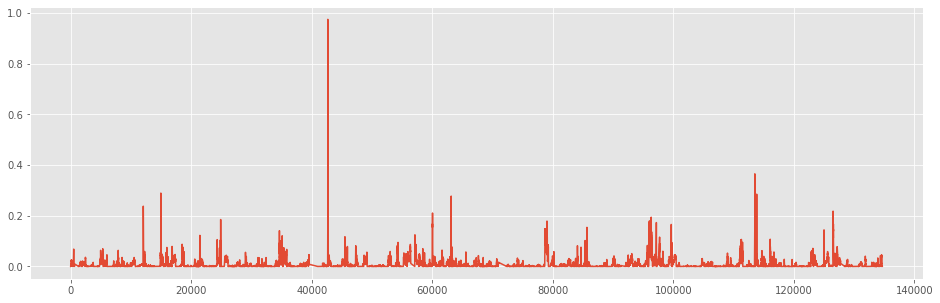

In [138]:
df['new_cases_cleaned'] = df['new_cases_smoothed'].fillna(1000).apply(
    lambda x: max(x, 1000)
)
df['new_deaths_cleaned'] = df['new_deaths_smoothed'].fillna(0).apply(
    lambda x: max(x, 0)
)

new_cases = df['new_cases_smoothed'].fillna(0)
print(sum(new_cases < 1000) / len(new_cases))

cases = df['new_cases_cleaned']
assert not cases.isnull().values.any()
ratios = df['new_deaths_cleaned'] / cases
df['death_ratio'] = ratios

plt.figure(figsize=(16,5))
# plt.ylim(0, 1)
plt.plot(ratios)

In [14]:
cases = df['new_cases_cleaned'].to_numpy()
deaths = df['new_deaths_cleaned'].to_numpy()
print(cases.shape, deaths.shape)
np.cov(cases, deaths)

(126075,) (126075,)


array([[nan, nan],
       [nan, nan]])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
134661    0.001000
134662    0.000714
134663    0.000714
134664    0.000714
134665    0.000429
Length: 126075, dtype: float64
0.0 0.975143


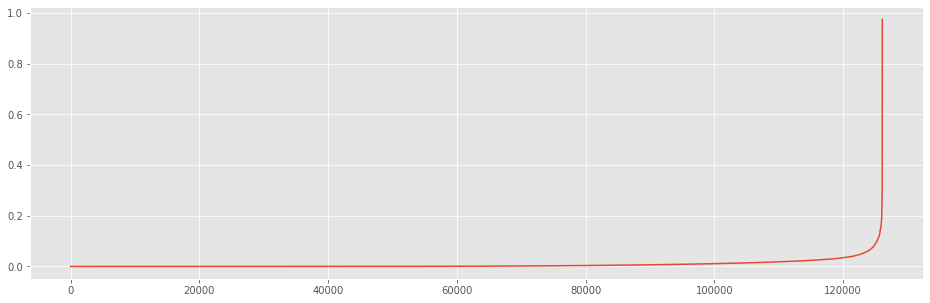

In [139]:
plt.figure(figsize=(16,5))
# plt.ylim(0, 1)
print(ratios)
print(min(ratios), max(ratios))
plt.plot(sorted(ratios))

In [60]:
!pip install scipy
from scipy import stats


-4.66523355675055 1.0209987921618455


(array([1.177e+03, 1.944e+03, 1.786e+03, 1.677e+03, 2.297e+03, 1.641e+03,
        2.447e+03, 1.786e+03, 2.177e+03, 2.484e+03, 2.147e+03, 2.517e+03,
        2.666e+03, 2.623e+03, 2.597e+03, 2.598e+03, 2.629e+03, 2.520e+03,
        2.490e+03, 2.390e+03, 2.442e+03, 2.093e+03, 1.968e+03, 1.658e+03,
        1.244e+03, 1.005e+03, 7.720e+02, 6.520e+02, 5.600e+02, 4.080e+02,
        3.660e+02, 2.710e+02, 2.530e+02, 2.470e+02, 1.260e+02, 1.250e+02,
        8.000e+01, 5.200e+01, 2.000e+01, 1.600e+01, 1.900e+01, 5.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00]),
 array([-6.49953647, -6.37004916, -6.24056186, -6.11107455, -5.98158724,
        -5.85209994, -5.72261263, -5.59312533, -5.46363802, -5.33415071,
        -5.20466341, -5.0751761 , -4.94568879, -4.81620149, -4.68671418,
        -4.55722687, -4.42773957, -4.29825226, -4.16876496, -4.03927765,
        -3.90979034, -3.78030304, -3.65081573, -3.52132842, -3.39184112,
        -3.

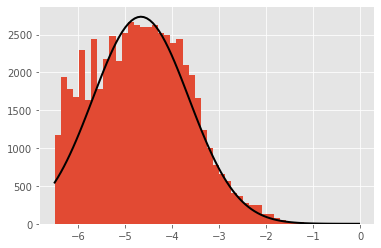

In [144]:
# https://stackoverflow.com/questions/48147652/how-does-scipy-stats-norm-fit-determine-the-parameters 
log_ratios = np.log(ratios + 1e-20)
df['log_ratios'] = log_ratios
log_ratios = log_ratios[log_ratios > -6.5]
mu, std = stats.norm.fit(log_ratios)
print(mu, std)

xmin, xmax = min(log_ratios), max(log_ratios)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
sp = 7000 * p

plt.plot(x, sp, 'k', linewidth=2)
plt.hist(log_ratios, bins=50)

(array([ 4.,  2.,  2.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
         1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  2.,  1.,  2.,  2.,  2.,  3.,  5., 39.]),
 array([0.0362014 , 0.05547732, 0.07475324, 0.09402915, 0.11330507,
        0.13258099, 0.1518569 , 0.17113282, 0.19040874, 0.20968465,
        0.22896057, 0.24823649, 0.26751241, 0.28678832, 0.30606424,
        0.32534016, 0.34461607, 0.36389199, 0.38316791, 0.40244382,
        0.42171974, 0.44099566, 0.46027157, 0.47954749, 0.49882341,
        0.51809933, 0.53737524, 0.55665116, 0.57592708, 0.59520299,
        0.61447891, 0.63375483, 0.65303074, 0.67230666, 0.69158258,
        0.71085849, 0.73013441, 0.74941033, 0.76868625, 0.78796216,
        0.80723808, 0.826514  , 0.84578991, 0.86506583, 0.88434175,
        0.90361766, 0.92289358, 0.9421695 , 0.96144541, 0.98072133,
        0.99999725]),
 <BarContainer

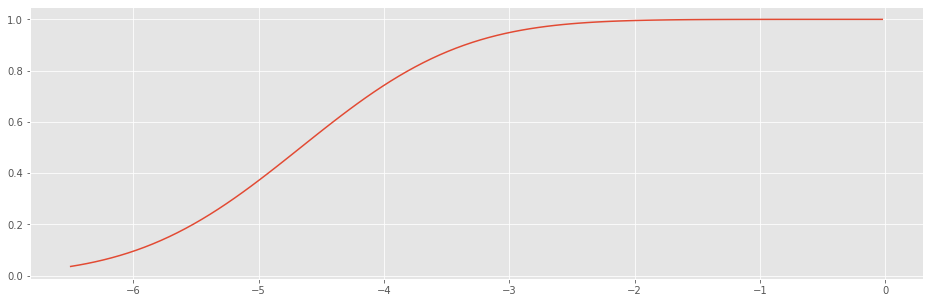

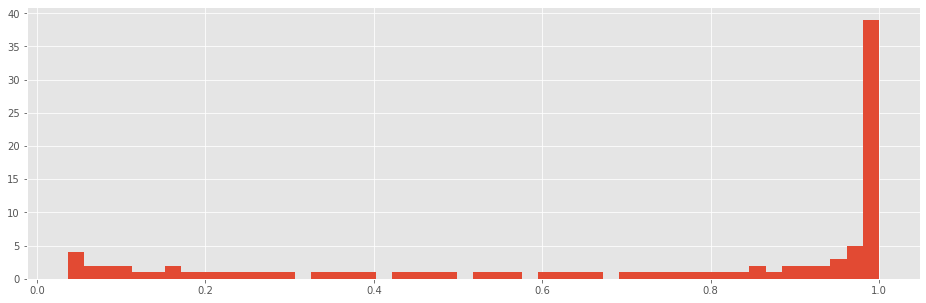

In [87]:
fit_cdf = stats.norm.cdf(x, mu, std)
plt.figure(figsize=(16,5))
plt.plot(x, fit_cdf)
plt.figure(figsize=(16,5))
plt.hist(cdf, bins=50)

(array([2192., 2676., 1661., 1568., 1562., 1410., 1290.,  715., 1140.,
        1144., 1105., 1040., 1419.,  965.,  860.,  821., 1264.,  850.,
        1108.,  853., 1100., 1008.,  999.,  970., 1100.,  916., 1012.,
        1012.,  994.,  953., 1117., 1058.,  953., 1106., 1163., 1099.,
        1079., 1184., 1311., 1267., 1243., 1208., 1326., 1345., 1162.,
        1058., 1060., 1046., 1096., 1397.]),
 array([0.0362014 , 0.05547732, 0.07475324, 0.09402915, 0.11330507,
        0.13258099, 0.1518569 , 0.17113282, 0.19040874, 0.20968465,
        0.22896057, 0.24823649, 0.26751241, 0.28678832, 0.30606424,
        0.32534016, 0.34461607, 0.36389199, 0.38316791, 0.40244382,
        0.42171974, 0.44099566, 0.46027157, 0.47954749, 0.49882341,
        0.51809933, 0.53737524, 0.55665116, 0.57592708, 0.59520299,
        0.61447891, 0.63375483, 0.65303074, 0.67230666, 0.69158258,
        0.71085849, 0.73013441, 0.74941033, 0.76868625, 0.78796216,
        0.80723808, 0.826514  , 0.84578991, 0.86506583, 

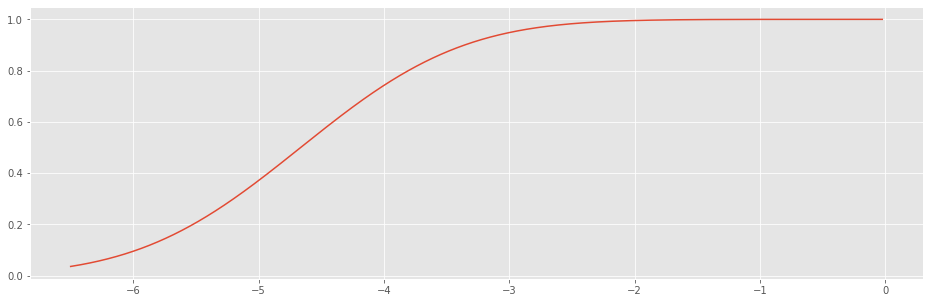

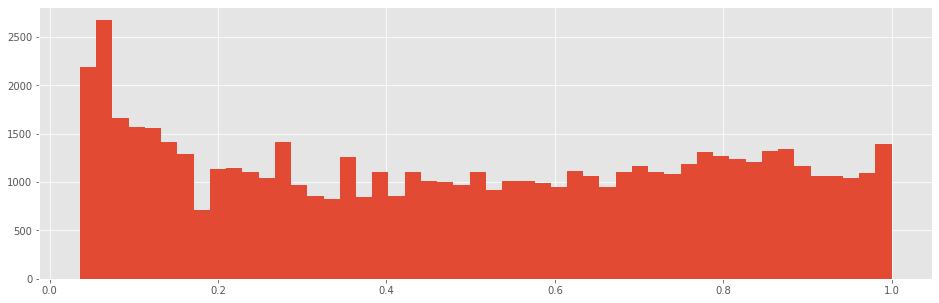

In [92]:
sort_log_ratios = sorted(log_ratios)
pred_cdf = stats.norm.cdf(sort_log_ratios, mu, std)
plt.figure(figsize=(16,5))
plt.plot(sort_log_ratios, pred_cdf)
plt.figure(figsize=(16,5))
plt.hist(pred_cdf, bins=50)

665.1416330443616


/home/milselarch/projects/SUTD/10-020-DDW/2D/venv/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


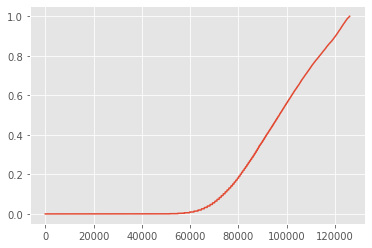

In [108]:
print(np.e ** 6.5)
ratios = df['new_deaths_cleaned'] / cases
df['target'] = stats.norm.cdf(np.log(ratios), mu, std)
plt.plot(sorted(df['target']))

(array([69225.,  4463.,  3922.,  3137.,  3186.,  2599.,  2535.,  2502.,
         2676.,  2583.,  2570.,  2664.,  2720.,  2726.,  2893.,  3227.,
         3223.,  3345.,  2760.,  3119.]),
 array([0.        , 0.04999986, 0.09999972, 0.14999959, 0.19999945,
        0.24999931, 0.29999917, 0.34999904, 0.3999989 , 0.44999876,
        0.49999862, 0.54999849, 0.59999835, 0.64999821, 0.69999807,
        0.74999794, 0.7999978 , 0.84999766, 0.89999752, 0.94999739,
        0.99999725]),
 <BarContainer object of 20 artists>)

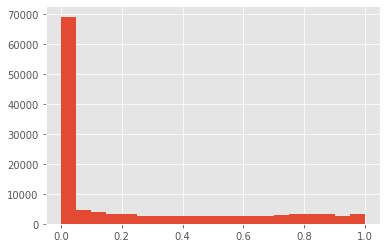

In [106]:
plt.hist(df['target'], bins=20)

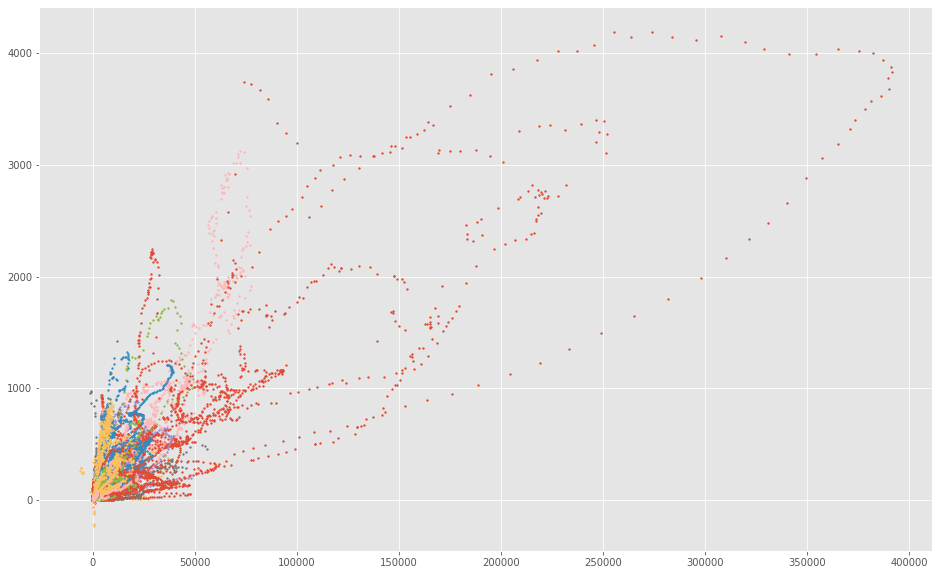

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))

for iso_code in countries:
    iso_df = df[df['iso_code'] == iso_code]
    icu_admissions = iso_df['new_deaths_smoothed'].fillna(0)
    cases = iso_df['new_cases_smoothed'].fillna(0)
    # cases = df['weekly_icu_admissions']
    plt.scatter(cases, icu_admissions, s=3)

['NIU' 'FLK' 'PCN' 'PLW' 'SHN' 'TKL' 'BES' 'NRU' 'COK' 'VGB']


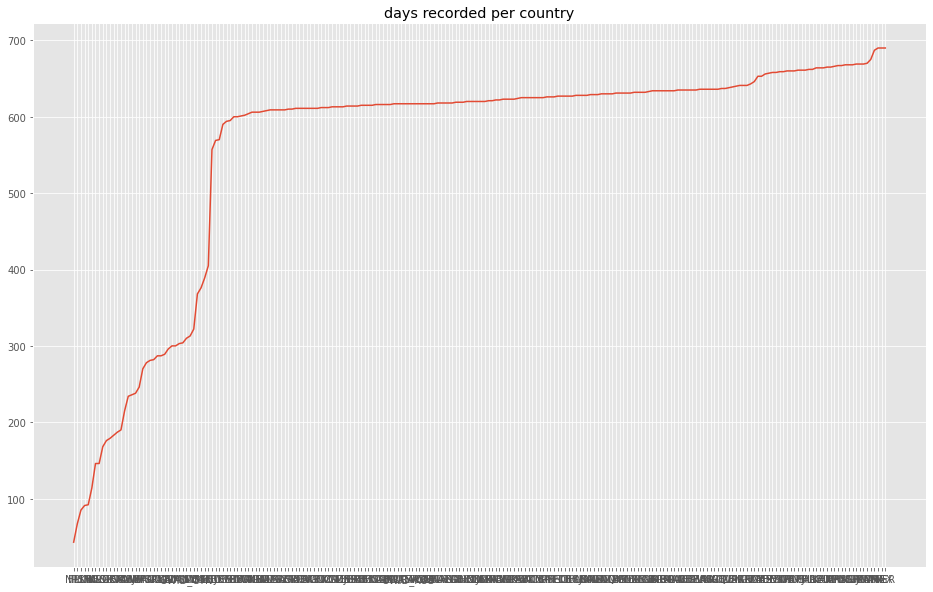

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
durations = []

for iso_code in countries:
    iso_df = df[df['iso_code'] == iso_code]
    duration = len(iso_df)
    durations.append(duration)

plt.title('days recorded per country')
durations = np.array(durations)
indexes = np.argsort(durations)
countries = countries[indexes]
durations = durations[indexes]
plt.plot(countries, durations)

print(countries[:10])

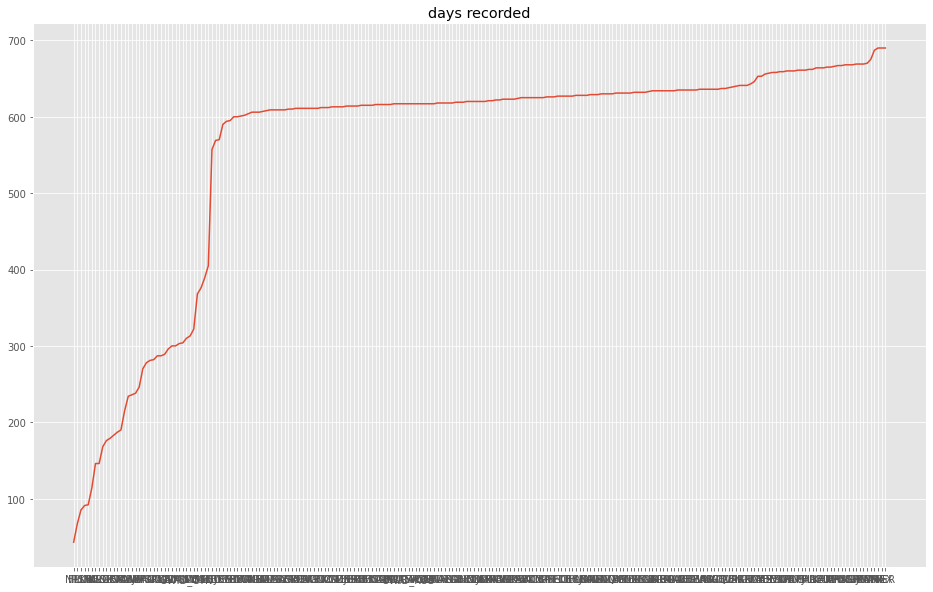

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
durations = []

for iso_code in countries:
    iso_df = df[df['iso_code'] == iso_code]
    duration = len(iso_df)
    durations.append(duration)

plt.title('days recorded')
plt.plot(countries, durations)

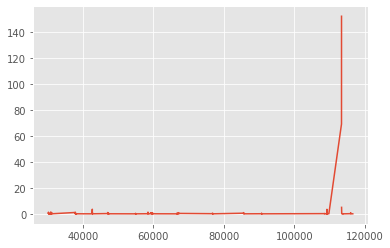

In [20]:
df['icu_case_ratio'] = df['weekly_icu_admissions'] / df['new_cases_smoothed']
icu_case_ratio = df['icu_case_ratio'][df['icu_case_ratio'].notna()]
plt.style.use('ggplot')
plt.plot(icu_case_ratio)

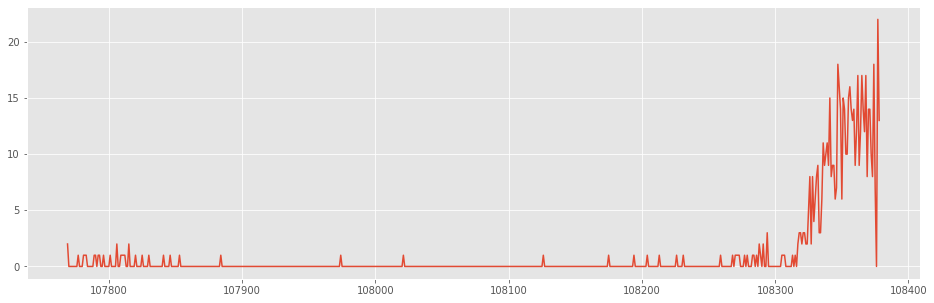

In [21]:
sg_data = df.loc[df['iso_code'] == 'SGP']
sgp_new_deaths = sg_data['new_deaths']
sgp_cases = sg_data['new_cases']
plt.style.use('ggplot')
plt.figure(figsize=(16,5))
plt.plot(sgp_new_deaths)

In [107]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,new_cases_cleaned,new_deaths_cleaned,icu_case_ratio,log_ratios,target
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,0.511,NaN,NaN,NaN,NaN,1000.0,0.000,NaN,0.000000,0.000000
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,0.511,NaN,NaN,NaN,NaN,1000.0,0.000,NaN,0.000000,0.000000
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,0.511,NaN,NaN,NaN,NaN,1000.0,0.000,NaN,0.000000,0.000000
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,0.511,NaN,NaN,NaN,NaN,1000.0,0.000,NaN,0.000000,0.000000
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,0.511,NaN,NaN,NaN,NaN,1000.0,0.000,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134661,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,0.571,NaN,NaN,NaN,NaN,1000.0,1.000,NaN,0.014032,0.014032
134662,ZWE,Africa,Zimbabwe,2021-11-17,133557.0,52.0,36.429,4699.0,1.0,0.714,...,0.571,NaN,NaN,NaN,NaN,1000.0,0.714,NaN,0.005763,0.005763
134663,ZWE,Africa,Zimbabwe,2021-11-18,133593.0,36.0,37.714,4699.0,0.0,0.714,...,0.571,NaN,NaN,NaN,NaN,1000.0,0.714,NaN,0.005763,0.005763
134664,ZWE,Africa,Zimbabwe,2021-11-19,133593.0,0.0,37.714,4699.0,0.0,0.714,...,0.571,NaN,NaN,NaN,NaN,1000.0,0.714,NaN,0.005763,0.005763


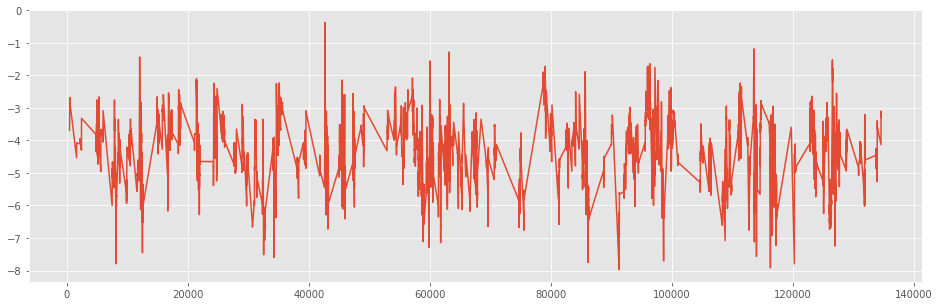

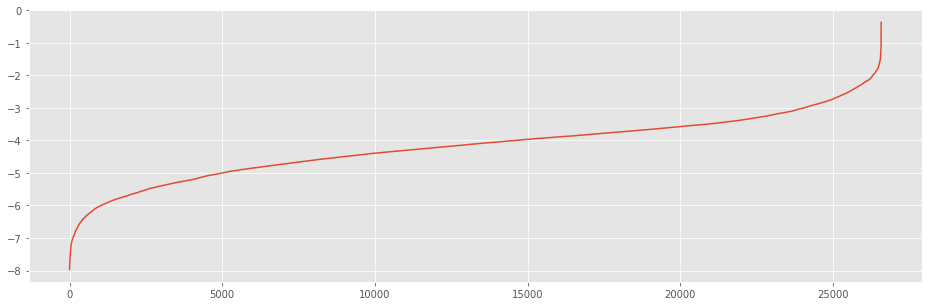

In [197]:
trainable_df = df[
    (df['new_cases_cleaned'] > 1000) &
    (df['log_ratios'] >= -8)
]

plt.figure(figsize=(16,5))
plt.plot(trainable_df['log_ratios'])
plt.figure(figsize=(16,5))
plt.plot(sorted(trainable_df['log_ratios']))

In [198]:
display(trainable_df)
print(trainable_df.columns)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,new_cases_cleaned,new_deaths_cleaned,icu_case_ratio,log_ratios,target,death_ratio
466,AFG,Asia,Afghanistan,2021-06-04,76628.0,1509.0,1071.143,3068.0,34.0,26.714,...,NaN,NaN,NaN,NaN,1071.143,26.714,NaN,-3.691294,0.829935,0.024940
467,AFG,Asia,Afghanistan,2021-06-05,77963.0,1335.0,1121.714,3104.0,36.0,29.286,...,NaN,NaN,NaN,NaN,1121.714,29.286,NaN,-3.645504,0.841044,0.026108
468,AFG,Asia,Afghanistan,2021-06-06,79224.0,1261.0,1209.000,3145.0,41.0,32.286,...,NaN,NaN,NaN,NaN,1209.000,32.286,NaN,-3.622915,0.846345,0.026705
469,AFG,Asia,Afghanistan,2021-06-07,80841.0,1617.0,1286.143,3187.0,42.0,34.714,...,NaN,NaN,NaN,NaN,1286.143,34.714,NaN,-3.612260,0.848804,0.026991
470,AFG,Asia,Afghanistan,2021-06-08,82326.0,1485.0,1335.571,3251.0,64.0,39.714,...,NaN,NaN,NaN,NaN,1335.571,39.714,NaN,-3.515410,0.869954,0.029736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134556,ZWE,Africa,Zimbabwe,2021-08-03,112435.0,1580.0,1532.000,3676.0,41.0,56.571,...,NaN,NaN,NaN,NaN,1532.000,56.571,NaN,-3.298833,0.909600,0.036926
134557,ZWE,Africa,Zimbabwe,2021-08-04,113526.0,1091.0,1422.714,3711.0,35.0,53.000,...,NaN,NaN,NaN,NaN,1422.714,53.000,NaN,-3.290030,0.910997,0.037253
134558,ZWE,Africa,Zimbabwe,2021-08-05,114489.0,963.0,1261.857,3754.0,43.0,47.571,...,NaN,NaN,NaN,NaN,1261.857,47.571,NaN,-3.278116,0.912861,0.037699
134559,ZWE,Africa,Zimbabwe,2021-08-06,115445.0,956.0,1136.429,3805.0,51.0,45.000,...,NaN,NaN,NaN,NaN,1136.429,45.000,NaN,-3.228984,0.920243,0.039598


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [199]:
!pip install sklearn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

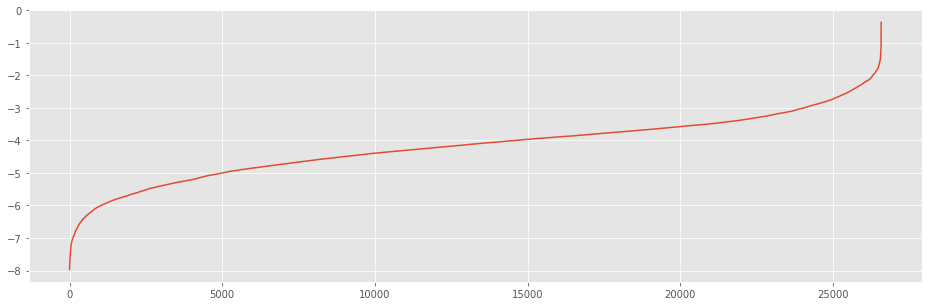

In [200]:
plt.figure(figsize=(16,5))
plt.plot(sorted(trainable_df['log_ratios']))

In [201]:
features = trainable_df[[
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'median_age', 'gdp_per_capita', 'aged_65_older', 'aged_70_older', 'life_expectancy', 
    'human_development_index', 'population_density'
]].fillna(0)

scaler = StandardScaler()
scaler.fit(features)
norm_features = scaler.transform(features)

target = trainable_df[['log_ratios']]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    norm_features, target, test_size=0.2, random_state=42, shuffle=True
)

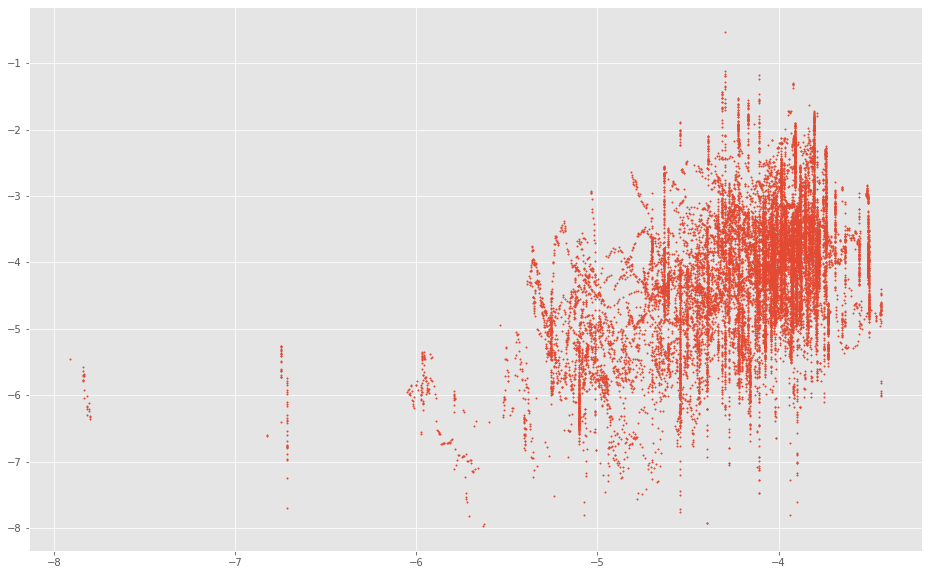

In [202]:
clf = LinearRegression().fit(X_train, y_train)
train_pred = clf.predict(X_train)
plt.figure(figsize=(16,10))
plt.scatter(train_pred, y_train, s=2)

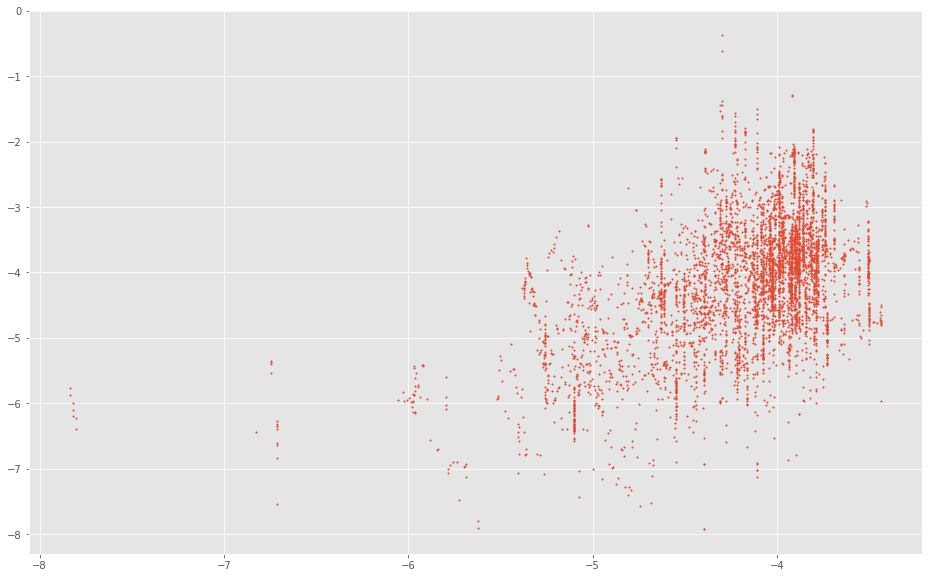

In [203]:
test_pred = clf.predict(X_test)
plt.figure(figsize=(16,10))
plt.scatter(test_pred, y_test, s=2)